In [37]:
import pandas as pd
df = pd.read_csv('ks-projects-201801.csv')

In [38]:
df.shape

(378661, 15)

### Data Cleansing

Removing nulls, checking types, checking row uniqueness, checking data values, getting timeframe differrence, checking if some data is invalid(I dont' see a rule in this last point)

In [39]:
df.dropna(inplace=True)
df.shape

(374860, 15)

In [40]:
df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

###### the numbered data are really numbers, no need to convert any type

In [41]:
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

###### Above seems we will need to keep only the "failed" and "succesfful" states. But first let us get rid of some of unseful columns

In [42]:
df.drop(['ID','category','currency'],axis=1,inplace=True)

###### generating the timeframe columns then get rid of the deadline and launched columns

In [43]:
from datetime import datetime
def days_between(dd1, dd2):
    ddres=[]
    for d1,d2 in zip(dd1,dd2):
        d1 = datetime.strptime(d1, "%Y-%m-%d")
        d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
        ddres.append(abs((d2 - d1).days))
    return ddres

df['timeframe']=days_between(df['deadline'],df['launched'])

In [44]:
df.drop(['deadline','launched'],axis=1, inplace=True)
df.head()

,name,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,Where is Hank?,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,30
4,Community Film Project: The Art of Neighborhoo...,Film & Video,19500.0,1283.0,canceled,14,US,1283.0,1283.0,19500.00,56


In [45]:
df=df[df.state.isin(['failed','successful'])]

In [46]:
df.shape

(331462, 11)

In [47]:
df

,name,main_category,goal,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,timeframe
0,The Songs of Adelaide & Abullah,Publishing,1000.0,0.0,failed,0,GB,0.0,0.0,1533.95,59
1,Greeting From Earth: ZGAC Arts Capsule For ET,Film & Video,30000.0,2421.0,failed,15,US,100.0,2421.0,30000.00,60
2,Where is Hank?,Film & Video,45000.0,220.0,failed,3,US,220.0,220.0,45000.00,45
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,5000.0,1.0,failed,1,US,1.0,1.0,5000.00,30
5,Monarch Espresso Bar,Food,50000.0,52375.0,successful,224,US,52375.0,52375.0,50000.00,35
...,...,...,...,...,...,...,...,...,...,...,...
378654,"Homemade fresh dog food, Cleveland OH",Food,6500.0,154.0,failed,4,US,0.0,154.0,6500.00,30
378657,The Tribe,Film & Video,1500.0,155.0,failed,5,US,155.0,155.0,1500.00,27
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Film & Video,15000.0,20.0,failed,1,US,20.0,20.0,15000.00,46
378659,BioDefense Education Kit,Technology,15000.0,200.0,failed,6,US,200.0,200.0,15000.00,31


chaning state column to 0 or 1

In [48]:
df.loc[df['state']=='failed','result']=0
df.loc[df['state']=='successful','result']=1

In [49]:
df.drop(['country','name','state'],axis=1,inplace=True)
df.drop_duplicates(inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ACAEE6508>,
      dtype=object)

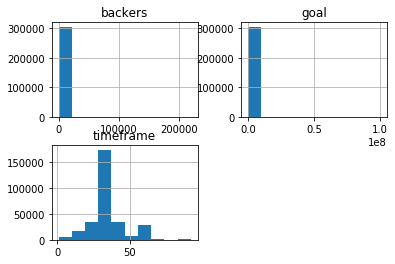

In [50]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
#ax.boxplot(df['backers'])
#ax.hist(df['goal'].T)
#plt.show()
df[['backers','goal','timeframe']].hist(bins=10)

Above shows that timeframe has a normal distribution, while others are very centric

In [51]:
features=df.drop('result',axis=1)
labels=df['result']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=42)

# Centring data 
   

In [53]:
# hot encoding and keepying the lb_style for prediction
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_style.fit(X_train["main_category"],)
x_train=lb_style.transform(X_train['main_category'])
x_test=lb_style.transform(X_test['main_category'])
#dfd=df.join(pd.DataFrame(lb_results, columns=lb_style.classes_, index = df.index))
#df = dfd.drop('main_category',axis=1)

In [54]:
X_train=X_train.drop('main_category',axis=1).join(pd.DataFrame(x_train,columns=lb_style.classes_,index=X_train.index))
X_test=X_test.drop('main_category',axis=1).join(pd.DataFrame(x_test,columns=lb_style.classes_,index=X_test.index))
X_train
X_test

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
124323,500.0,50.00,2,50.00,50.00,500.00,14,0,0,0,...,0,0,0,0,0,0,1,0,0,0
330593,6000.0,65.00,4,65.00,65.00,6000.00,60,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52006,500.0,10.00,2,10.00,10.00,500.00,15,0,0,0,...,0,0,0,0,0,0,1,0,0,0
238413,2000.0,2055.77,49,2055.77,2055.77,2000.00,47,0,0,0,...,0,0,0,0,0,1,0,0,0,0
308207,5000.0,7016.00,54,7016.00,7016.00,5000.00,30,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288107,100000.0,145650.00,58,17334.25,18665.66,12815.42,30,0,0,0,...,0,0,0,0,0,0,0,0,0,0
215153,500.0,250.00,1,250.00,250.00,500.00,60,0,0,0,...,0,1,0,0,0,0,0,0,0,0
314475,13000.0,16034.00,315,16034.00,16034.00,13000.00,33,0,0,0,...,0,0,0,0,0,1,0,0,0,0
318464,750.0,782.00,24,0.00,597.91,573.44,36,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Standardization of all

In [55]:
from sklearn import preprocessing
# Get column names first
names = X_train.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaler.fit(X_train)
train=scaler.transform(X_train)
test=scaler.transform(X_test)
X_train= pd.DataFrame(train, columns=names)
X_test= pd.DataFrame(test, columns=names)
X_test.head()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
0,-0.038880,-0.106224,-0.122004,-0.094703,-0.105176,-0.036749,-1.551903,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.396160,5.726004,-0.3366,-0.295945,-0.183823
1,-0.034330,-0.106086,-0.120068,-0.094535,-0.105031,-0.032166,2.037374,-0.290628,5.512011,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.396160,-0.174642,-0.3366,-0.295945,-0.183823
2,-0.038880,-0.106592,-0.122004,-0.095153,-0.105562,-0.036749,-1.473875,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,-0.396160,5.726004,-0.3366,-0.295945,-0.183823
3,-0.037639,-0.087802,-0.076515,-0.072156,-0.085801,-0.035500,1.023013,-0.290628,-0.181422,-0.154076,...,-0.246782,-0.450383,-0.263136,-0.316468,-0.111451,2.524234,-0.174642,-0.3366,-0.295945,-0.183823
4,-0.035157,-0.042245,-0.071676,-0.016399,-0.037886,-0.033000,-0.303459,-0.290628,-0.181422,-0.154076,...,-0.246782,2.220334,-0.263136,-0.316468,-0.111451,-0.396160,-0.174642,-0.3366,-0.295945,-0.183823


In [56]:
X_test.shape[0]+X_train.shape[0]

305346

# finding if lot of columns are correlated

In [57]:
X_train.corr()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,timeframe,Art,Comics,Crafts,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
goal,1.000000,0.007644,0.004379,0.005715,0.005245,0.967005,0.021236,0.000512,-0.003314,-0.004835,...,-0.004015,0.013629,-0.000506,-0.000499,0.004787,-0.010369,-0.005226,-0.007154,0.016360,-0.003704
pledged,0.007644,1.000000,0.706915,0.855875,0.949571,0.005035,0.007080,-0.019816,-0.007201,-0.013273,...,-0.007859,-0.015306,-0.011753,0.044062,-0.007521,-0.025310,-0.011971,-0.021699,0.045935,-0.012440
backers,0.004379,0.706915,1.000000,0.725912,0.744618,0.004740,-0.001203,-0.021862,0.003197,-0.013979,...,-0.012273,-0.019278,-0.015363,0.081869,-0.008471,-0.024754,-0.014111,-0.018246,0.024978,-0.014002
usd pledged,0.005715,0.855875,0.725912,1.000000,0.910308,0.006107,0.006776,-0.017699,-0.005540,-0.012204,...,-0.008410,-0.008055,-0.009142,0.040750,-0.007131,-0.020399,-0.010546,-0.019561,0.037493,-0.009719
usd_pledged_real,0.005245,0.949571,0.744618,0.910308,1.000000,0.005507,0.007317,-0.019980,-0.006767,-0.013332,...,-0.008837,-0.014092,-0.011346,0.045846,-0.008173,-0.024606,-0.011633,-0.021711,0.045850,-0.011915
usd_goal_real,0.967005,0.005035,0.004740,0.006107,0.005507,1.000000,0.020138,0.000747,-0.002963,-0.004629,...,-0.004107,0.014134,0.000812,-0.000510,0.004742,-0.009709,-0.004934,-0.006669,0.012676,-0.003291
timeframe,0.021236,0.007080,-0.001203,0.006776,0.007317,0.020138,1.000000,-0.035991,0.001600,-0.030220,...,-0.025547,0.032763,0.000225,-0.045258,0.002710,0.043113,-0.002661,-0.004647,0.033668,-0.011058
Art,0.000512,-0.019816,-0.021862,-0.017699,-0.019980,0.000747,-0.035991,1.000000,-0.052726,-0.044779,...,-0.071722,-0.130894,-0.076475,-0.091975,-0.032391,-0.115135,-0.050756,-0.097825,-0.086010,-0.053424
Comics,-0.003314,-0.007201,0.003197,-0.005540,-0.006767,-0.002963,0.001600,-0.052726,1.000000,-0.027953,...,-0.044772,-0.081709,-0.047739,-0.057414,-0.020220,-0.071872,-0.031684,-0.061067,-0.053691,-0.033349
Crafts,-0.004835,-0.013273,-0.013979,-0.012204,-0.013332,-0.004629,-0.030220,-0.044779,-0.027953,1.000000,...,-0.038023,-0.069393,-0.040543,-0.048760,-0.017172,-0.061039,-0.026908,-0.051862,-0.045598,-0.028323


..

In [58]:
X_train.median()

goal               -0.035157
pledged            -0.096856
backers            -0.105551
usd pledged        -0.087397
usd_pledged_real   -0.095252
usd_goal_real      -0.033000
timeframe          -0.303459
Art                -0.290628
Comics             -0.181422
Crafts             -0.154076
Dance              -0.107053
Design             -0.297661
Fashion            -0.246782
Film & Video       -0.450383
Food               -0.263136
Games              -0.316468
Journalism         -0.111451
Music              -0.396160
Photography        -0.174642
Publishing         -0.336600
Technology         -0.295945
Theater            -0.183823
dtype: float64

In [59]:
import matplotlib.pyplot as plt

(array([  4128.,  10971.,  22542., 116893.,  22759.,   5410.,  19451.,
           464.,    319.,   1644.]),
 array([-2.5662636 , -1.85621109, -1.14615857, -0.43610605,  0.27394647,
         0.98399899,  1.6940515 ,  2.40410402,  3.11415654,  3.82420906,
         4.53426158]),
 <a list of 10 Patch objects>)

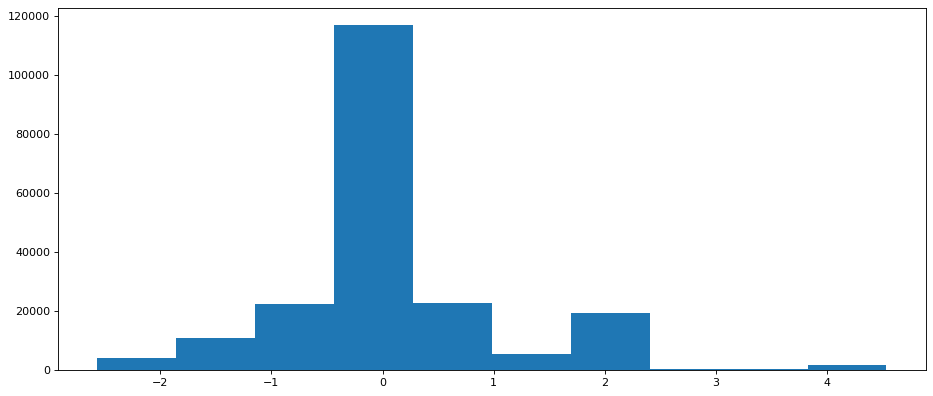

In [60]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='w', edgecolor='k')
#ax.boxplot(df['backers'])
ax.hist(X_train['timeframe'])

In [61]:
str(X_train.shape) + str(X_test.shape)

'(204581, 22)(100765, 22)'

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X_train.columns)-2)
pca.fit(X_train)
train=pca.transform(X_train)
test=pca.transform(X_test)
X_train= pd.DataFrame(data = train)
X_test = pd.DataFrame(data = test)

In [63]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.276633,-0.145952,0.662935,-0.728291,-0.251903,-0.257056,0.020641,-0.107981,0.081009,0.304577,1.977090,0.633406,5.206428,-1.274315,-0.521898,-0.039718,-1.303614,-0.006153,-0.002049,0.000185
1,-0.222894,-0.007456,-0.224639,0.636393,0.536553,-0.489207,-0.242187,-0.357477,0.076522,-0.076120,2.661786,4.612427,-1.910842,0.046669,-0.430231,-0.154138,1.482531,-0.080980,-0.006727,-0.001757
2,-0.276932,-0.143459,0.644275,-0.700020,-0.235741,-0.262618,0.015149,-0.113761,0.079418,0.297051,1.972831,0.640691,5.204791,-1.286300,-0.520073,-0.043666,-1.238169,-0.005369,-0.001950,0.000198
3,-0.216199,-0.063287,0.135850,2.726456,-0.635067,0.552667,0.145800,0.212553,-0.021349,-0.012266,-0.134447,-0.036704,-0.026380,-0.004554,-0.057611,-0.017731,0.310631,0.014565,-0.000296,0.000446
4,-0.115821,0.013955,-2.229698,-0.568536,-0.365387,0.306016,0.101100,0.148997,-0.024115,0.045197,-0.068649,-0.101135,-0.008044,0.120019,-0.063301,0.026921,-0.577785,-0.017542,-0.007281,0.000085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100760,0.828167,-0.015021,0.403217,-0.153070,0.468690,-1.217864,2.349794,-1.724909,-1.090716,-0.406020,-0.506708,-0.122213,-0.107061,0.054662,-0.168550,-0.005515,-0.434754,-0.499811,0.591275,0.635704
100761,-0.233887,0.084832,-2.788375,0.278145,0.119110,0.136379,-0.065711,-0.029767,-0.076240,-0.182466,-0.199185,0.117765,-0.058157,-0.240115,-0.009399,-0.091770,1.385767,0.003481,0.004462,-0.001520
100762,0.111820,-0.089411,0.395639,2.332905,-0.863505,0.641703,0.227540,0.306760,0.012303,0.097124,-0.067072,-0.137918,-0.001549,0.164490,-0.080950,0.038023,-0.605341,0.128067,-0.012782,0.008955
100763,-0.257854,-0.046676,0.680228,-0.721634,-0.585396,-0.986621,0.784902,2.795508,-0.347888,-0.907052,-0.526426,0.177465,-0.119051,-0.397488,-0.069277,-0.125696,0.829602,0.011769,0.003984,-0.001548


C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


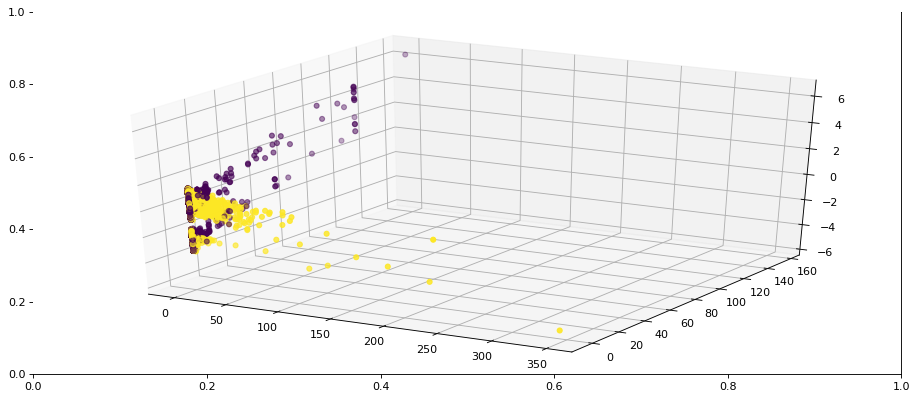

In [64]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[1],X_train[2],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


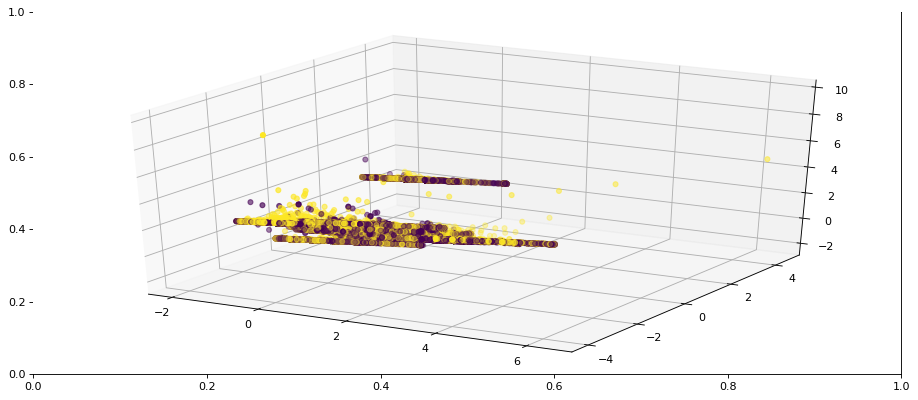

In [65]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[3],X_train[4],X_train[5],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


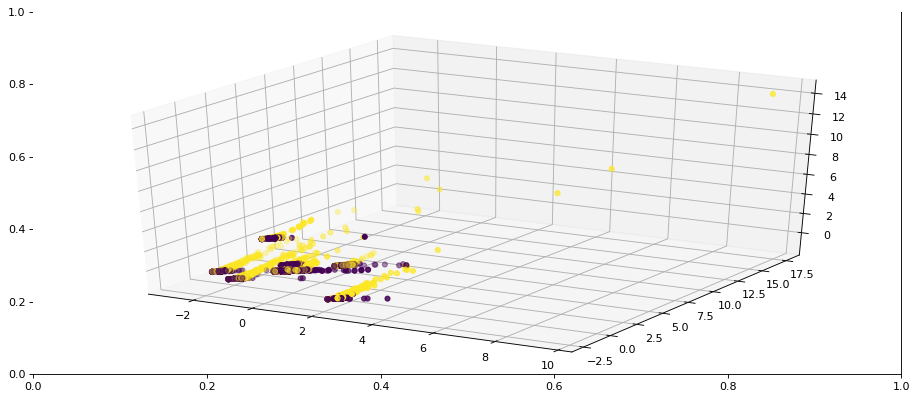

In [66]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[6],X_train[7],X_train[8],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


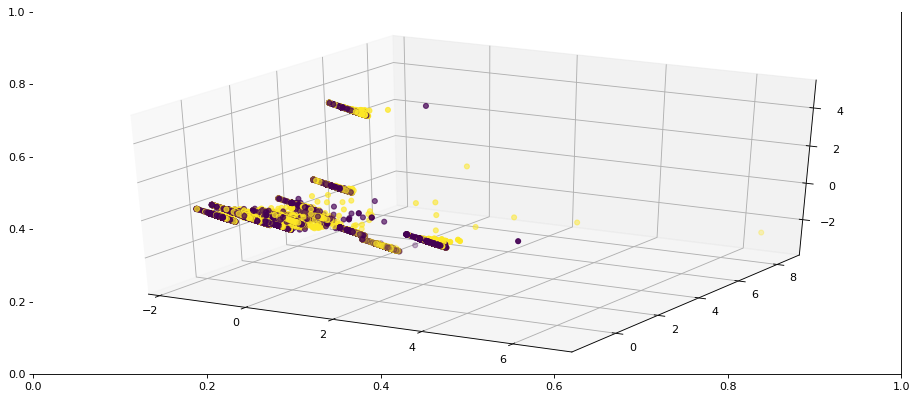

In [67]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[9],X_train[10],X_train[11],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


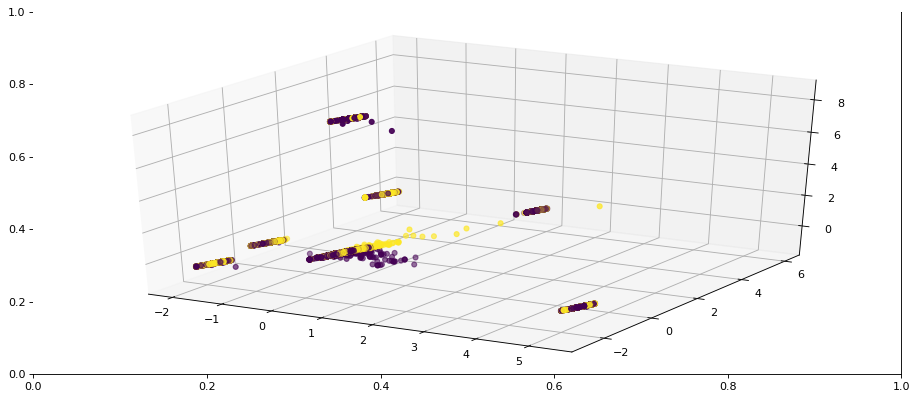

In [68]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[12],X_train[13],X_train[14],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


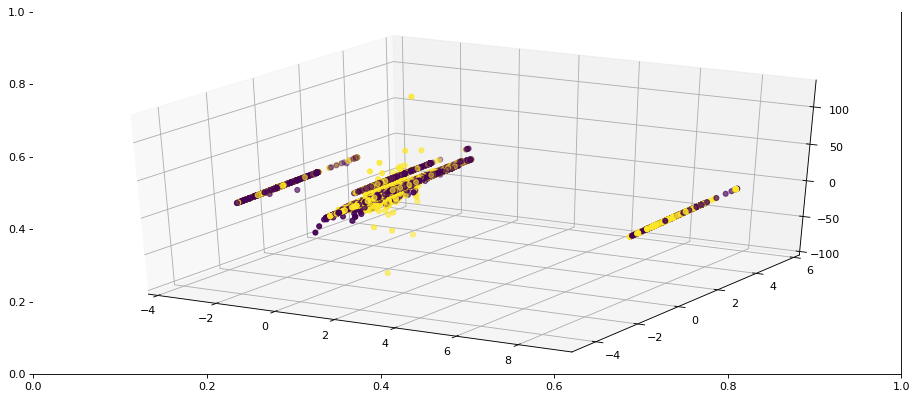

In [69]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[15],X_train[16],X_train[17],c=y_train)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  This is separate from the ipykernel package so we can avoid doing imports until


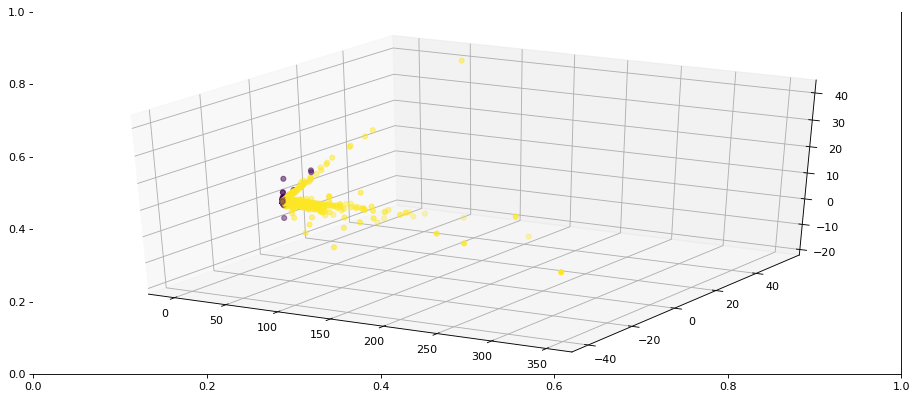

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig, ax = plt.subplots(num=None, figsize=(14,6), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
ax.scatter(X_train[0],X_train[18],X_train[19],c=y_train)

From above scatters we can see that we can train data as we see mostly separation between failed an succeeded proejcts

# Training with Logistics regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
trainscore=clf.score(X_train,y_train)
testscore=clf.score(X_test,y_test)
print('training score: ',trainscore,'  , test score: ',testscore)

C:\Users\Moata\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
